In [392]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
import seaborn as sns

In [393]:
train=pd.read_csv('bigmart_train.csv')

In [394]:
test=pd.read_csv('bigmart_test.csv')

In [395]:
train.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [396]:
train.shape

(8523, 12)

In [397]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [398]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [399]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [400]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

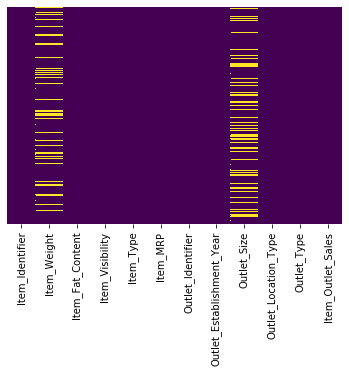

In [401]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [402]:
train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [403]:
train['outlet_Age']=2018-train['Outlet_Establishment_Year']

In [404]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31


In [405]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [406]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,outlet_Age
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,20.168133
std,4.643456,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,9.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,14.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,19.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,31.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,33.000000


In [407]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [408]:
train['Outlet_Size'].mode()[0]

'Medium'

In [409]:
train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [410]:
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].median())

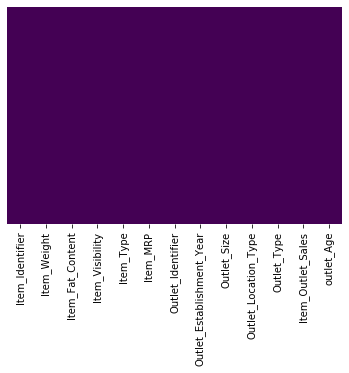

In [411]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [412]:
##Detecting the Outliers in train data

In [413]:
import seaborn as sns

In [414]:
train.loc[:,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,20
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,31
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,16
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,14
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,9


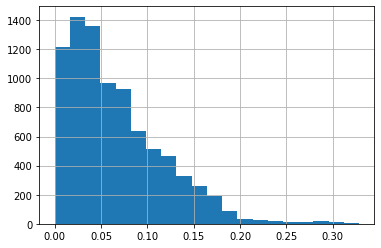

In [415]:
train['Item_Visibility'].hist(bins=20)

In [416]:
Q1=train['Item_Visibility'].quantile(0.25)
Q3=train['Item_Visibility'].quantile(0.75)
IQR=Q3-Q1
filt_train=train.query('(@Q1-1.5*@IQR) <=Item_Visibility <=(@Q3+1.5*@IQR)')

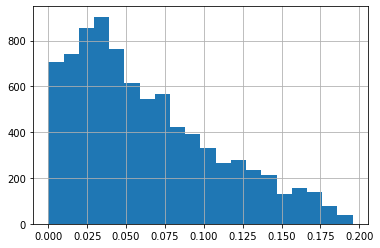

In [417]:
filt_train['Item_Visibility'].hist(bins=20)

In [418]:
filt_train.shape, train.shape

((8379, 13), (8523, 13))

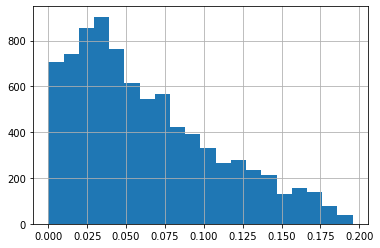

In [419]:
filt_train['Item_Visibility'].hist(bins=20)

In [420]:
train=filt_train
train.shape

(8379, 13)

In [421]:
train['item_Visibility_bins']=pd.cut(train['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'high Viz'])

C:\Users\AjaY\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [422]:
train['item_Visibility_bins'].value_counts()

Low Viz     4403
Viz         2557
high Viz     893
Name: item_Visibility_bins, dtype: int64

In [423]:
train['item_Visibility_bins']=train['item_Visibility_bins'].replace(np.nan,'Low Viz', regex=True)

C:\Users\AjaY\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [424]:
train['item_Visibility_bins'].value_counts()

Low Viz     4403
Viz         2557
high Viz     893
Name: item_Visibility_bins, dtype: int64

In [425]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace(['Low fat', 'LF'], 'Low Fat')

C:\Users\AjaY\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [426]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('reg', 'Regular')

C:\Users\AjaY\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [427]:
train['Item_Fat_Content'].value_counts()

Low Fat    5323
Regular    2947
low fat     109
Name: Item_Fat_Content, dtype: int64

In [428]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,outlet_Age,item_Visibility_bins
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19,Low Viz
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9,Low Viz
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19,Low Viz
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,20,NaN
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31,NaN
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,9,NaN
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,31,Low Viz
7,FDP10,12.600,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,33,Viz
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,16,Low Viz
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,11,Viz


In [429]:
train['item_Visibility_bins'].unique()

[Low Viz, NaN, Viz, high Viz]
Categories (3, object): [Low Viz < Viz < high Viz]

In [430]:
train['item_Visibility_bins'].mode()[0]

'Low Viz'

In [431]:
train['item_Visibility_bins']=train['item_Visibility_bins'].fillna(train['item_Visibility_bins'].mode()[0])

C:\Users\AjaY\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [432]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,outlet_Age,item_Visibility_bins
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19,Low Viz
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9,Low Viz
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19,Low Viz
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,20,Low Viz
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31,Low Viz
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,9,Low Viz
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,31,Low Viz
7,FDP10,12.600,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,33,Viz
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,16,Low Viz
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,11,Viz


In [433]:
train.dtypes

Item_Identifier                object
Item_Weight                   float64
Item_Fat_Content               object
Item_Visibility               float64
Item_Type                      object
Item_MRP                      float64
Outlet_Identifier              object
Outlet_Establishment_Year       int64
Outlet_Size                    object
Outlet_Location_Type           object
Outlet_Type                    object
Item_Outlet_Sales             float64
outlet_Age                      int64
item_Visibility_bins         category
dtype: object

In [434]:
le=LabelEncoder()

In [435]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat'], dtype=object)

In [436]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('low fat','Low Fat')

C:\Users\AjaY\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [437]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [438]:
train['Item_Fat_Content']=le.fit_transform(train['Item_Fat_Content'])

C:\Users\AjaY\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [439]:
train['item_Visibility_bins']=le.fit_transform(train['item_Visibility_bins'])

C:\Users\AjaY\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [440]:
train['Outlet_Size']=le.fit_transform(train['Outlet_Size'])

C:\Users\AjaY\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [441]:
train['Outlet_Location_Type']=le.fit_transform(train['Outlet_Location_Type'])

C:\Users\AjaY\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [442]:
dummy=pd.get_dummies(train['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [443]:
train=pd.concat([train, dummy], axis=1)

In [444]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,outlet_Age,item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,19,0,0,1,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,9,0,0,0,1,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,19,0,0,1,0,0
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,20,0,1,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,31,0,0,1,0,0


In [445]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
outlet_Age                     int64
item_Visibility_bins           int32
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [446]:
train=train.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type', 'Outlet_Establishment_Year'], axis=1)

In [447]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'outlet_Age', 'item_Visibility_bins', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [448]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,outlet_Age,item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,19,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,9,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,19,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,20,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,31,0,0,1,0,0


In [449]:
X=train.drop('Item_Outlet_Sales', axis=1)
y=train.Item_Outlet_Sales

In [450]:
test['Outlet_Size']=test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [451]:
test['Item_Visibility_bins']=pd.cut(test['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])

In [452]:
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [453]:
test['Item_Visibility_bins']=test['Item_Visibility_bins'].fillna(test['Item_Visibility_bins'].mode()[0])

In [454]:
test['outlet_Age']=2018-test['Outlet_Establishment_Year']

In [455]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_bins,outlet_Age
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Low Viz,19
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,Low Viz,11
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,Viz,20
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,Low Viz,11
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Viz,33


In [456]:
test['Item_Fat_Content']=le.fit_transform(test['Item_Fat_Content'])
test['Item_Visibility_bins']=le.fit_transform(test['Item_Visibility_bins'])
test['Outlet_Size']=le.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type']=le.fit_transform(test['Outlet_Location_Type'])

In [457]:
dummy=pd.get_dummies(test['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1


In [458]:
test=pd.concat([test, dummy], axis=1)

In [459]:
X_test=test.drop(['Item_Identifier', 'Item_Type','Outlet_Identifier','Outlet_Type', 'Outlet_Establishment_Year'], axis=1)

In [460]:
X_test.dtypes

Item_Weight             float64
Item_Fat_Content          int32
Item_Visibility         float64
Item_MRP                float64
Outlet_Size               int32
Outlet_Location_Type      int32
Item_Visibility_bins      int32
outlet_Age                int64
Grocery Store             uint8
Supermarket Type1         uint8
Supermarket Type2         uint8
Supermarket Type3         uint8
dtype: object

In [461]:
X.dtypes

Item_Weight             float64
Item_Fat_Content          int32
Item_Visibility         float64
Item_MRP                float64
Outlet_Size               int32
Outlet_Location_Type      int32
outlet_Age                int64
item_Visibility_bins      int32
Grocery Store             uint8
Supermarket Type1         uint8
Supermarket Type2         uint8
Supermarket Type3         uint8
dtype: object

In [462]:
X.columns, X_test.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'outlet_Age',
        'item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Item_Visibility_bins',
        'outlet_Age', 'Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
        'Supermarket Type3'],
       dtype='object'))

In [463]:
from sklearn import model_selection
xtrain, xtest, ytrain, ytest=model_selection.train_test_split(X,y,test_size=0.3, random_state=60)

In [464]:
#Fitting the linear regression model
model1=LinearRegression()
model1.fit(xtrain, ytrain)
print(model1.coef_)
model1.intercept_

[ 4.12562939e-01  5.12866161e+01 -1.62704262e+03  1.59139504e+01
  4.75413491e+01  2.11459560e+01  6.09748859e-01  8.80970347e+01
 -1.74069841e+03  2.29946676e+02 -9.82309485e+01  1.60898268e+03]


-217.01830440652384

In [465]:
#checking the accuracy of the model
accuracy1=model1.score(xtest,ytest)
print(accuracy1*100,'%')

56.4444734712692 %


In [466]:
predictions=model1.predict(xtest)
print(ytest)
print(predictions)
print(sqrt(mean_squared_error(ytest, predictions)))

8250     228.3694
3003    2501.4106
1789     175.1054
3779    3563.3616
7052    3675.2160
          ...    
7768    1986.0814
772     3237.1196
3047     382.1692
7714    2985.4472
4642    1225.0720
Name: Item_Outlet_Sales, Length: 2514, dtype: float64
[1795.89524067 2278.1145854   856.82779642 ... 1133.86976615 2560.74490066
 1056.82202112]
1111.3282238821516


In [467]:
from sklearn.linear_model import Ridge
model2=Ridge(alpha=0.001, normalize=True)
model2.fit(xtrain, ytrain)
print(sqrt(mean_squared_error(ytrain, model2.predict(xtrain))))
print(sqrt(mean_squared_error(ytest, model2.predict(xtest))))
accuracy2=model2.score(xtest,ytest)
print(accuracy2*100,'%')

1142.0325709310896
1111.2993168297419
56.44673931044459 %


In [468]:
from sklearn.linear_model import Lasso
model3=Lasso(alpha=0.001, normalize=True)
model3.fit(xtrain, ytrain)
print(sqrt(mean_squared_error(ytrain, model3.predict(xtrain))))
print(sqrt(mean_squared_error(ytest, model3.predict(xtest))))
accuracy3=model3.score(xtest,ytest)
print(accuracy3*100,'%')

1142.0319652776159
1111.3084222384398
56.446025601982186 %


In [469]:
from sklearn.linear_model import ElasticNet
model4=ElasticNet(alpha=0.001, normalize=True)
model4.fit(xtrain, ytrain)
print(sqrt(mean_squared_error(ytrain, model4.predict(xtrain))))
print(sqrt(mean_squared_error(ytest, model4.predict(xtest))))
accuracy4=model4.score(xtest,ytest)
print(accuracy4*100,'%')

1475.0245350705832
1441.3672962935607
26.73308456341925 %
